# Time Series Analysis with Statsmodels

In [9]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pylab as plt
%matplotlib inline

## Simple Linear Regression

In [13]:
numPoints = 20
x = np.linspace(-5, 5, numPoints)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

In [14]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sun, 11 Mar 2018   Prob (F-statistic):           8.56e-08
Time:                        22:34:48   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

## Time Series Analysis

In [16]:
# Function loads historical stock prices of 30 DJ companies and returns them together
import pandas as pd
df = pd.read_pickle('.\data\DowJonesPricesFromYahoo.pkl')

# We remove any missing data
df.dropna(inplace=True)

In [17]:
df.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2008-03-19,17.400475,36.908495,61.077398,59.969324,21.842601,63.884423,32.967519,28.272361,27.006786,152.316179,...,27.788638,15.161948,53.885155,38.364202,32.758480,57.891721,13.418429,22.318548,42.863984,70.244690
2008-03-20,17.883556,40.406014,62.199996,60.042524,22.110390,64.914187,32.953018,28.869664,28.448565,164.337529,...,30.233569,15.147235,55.124812,39.504962,32.546541,58.102206,15.282759,22.947507,44.932058,70.718922
2008-03-24,18.723591,41.662660,63.439005,61.840057,22.886976,65.538290,33.830312,28.996366,28.380270,163.651379,...,31.047051,15.161948,55.601600,39.422296,32.905916,59.221980,14.185536,23.487528,45.269704,71.509308
2008-03-25,18.918164,41.750537,63.114701,62.336210,22.985165,65.951755,34.294337,29.032567,28.281622,164.337529,...,30.727951,15.287011,55.259901,39.480160,32.509681,59.070437,15.021516,23.443053,44.780118,70.885317
2008-03-26,19.465665,39.861175,63.447322,62.921833,22.119317,66.279406,33.953570,28.742964,28.175386,160.540823,...,29.784133,15.220801,55.339365,39.306567,31.422339,58.607368,15.190136,22.960212,44.653503,71.767228


### Pulling Out a Single Time Series

In [18]:
timeSeries = df['AAPL']

In [19]:
type(timeSeries)

pandas.core.series.Series

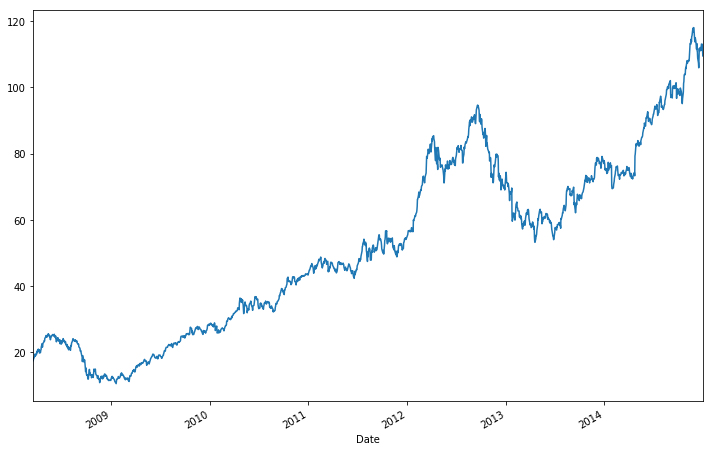

In [20]:
timeSeries.plot(figsize=(12,8))

In [21]:
# Set the time period of the observations
import datetime as dt
start = dt.datetime(2009,1,1)
end = dt.datetime(2014,1,1)

In [22]:
timeSeries = timeSeries[start:end]

## Time Series Models

In [34]:
from statsmodels.api import tsa

In [35]:
firstDifferences = timeSeries - timeSeries.shift(1)

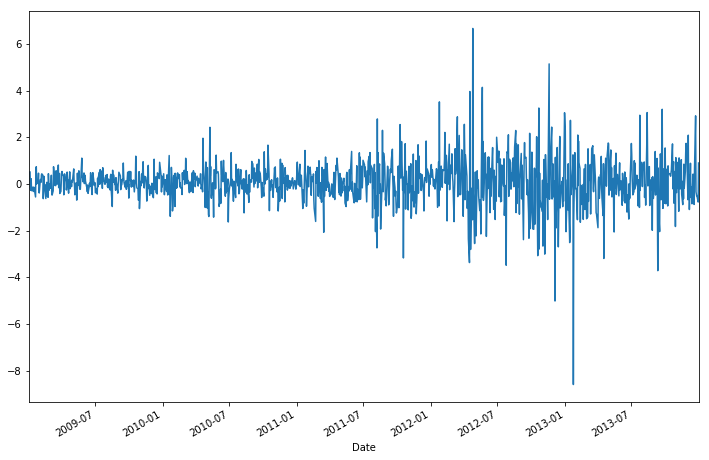

In [36]:
firstDifferences.plot(figsize=(12,8))

In [37]:
# The differences look to be fairly symmetric about zero but grow over time suggesting an exponential process
logTimeSeries = timeSeries.apply(lambda x: np.log(x))  

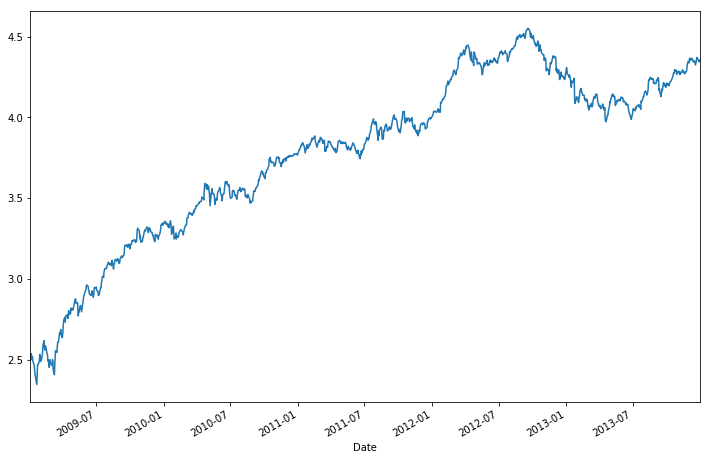

In [38]:
logTimeSeries.plot(figsize=(12,8))

In [39]:
logFirstDifferences = logTimeSeries - logTimeSeries.shift(1)

In [40]:
logFirstDifferences.dropna(inplace=True)

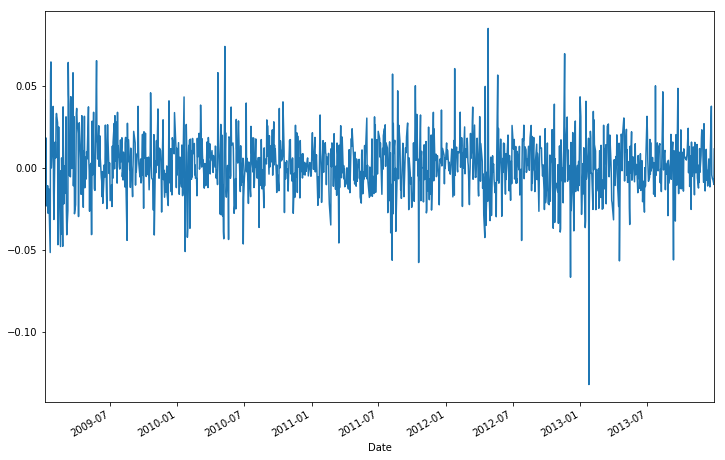

In [41]:
logFirstDifferences.plot(figsize=(12,8))

This looks more stationary

## Autocorrelation Measures

In [45]:
import statsmodels.api as sm

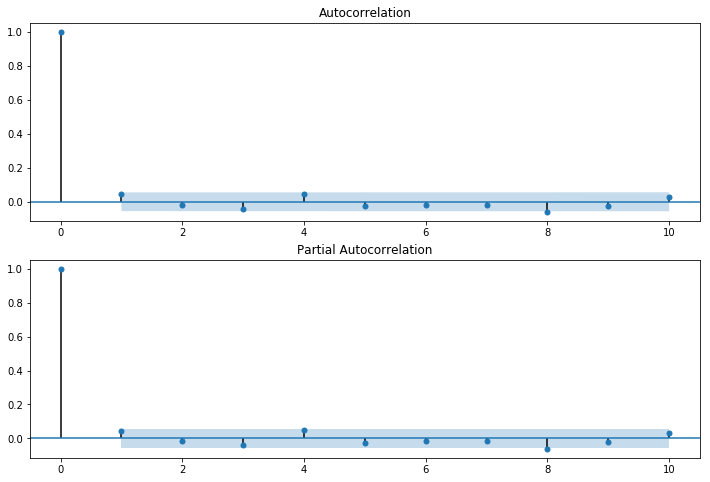

In [47]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(logFirstDifferences.values.squeeze(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(logFirstDifferences.values.squeeze(), lags=10, ax=ax2)

Looks like there is no serial correlation

## Dickey-Fuller Test

The test for stationarity is the Augmented Dickey-Fuller 

In [48]:
from statsmodels.tsa.stattools import adfuller

In [49]:
dfTest = adfuller(logFirstDifferences, maxlag=10)

In [50]:
print(dfTest)

(-17.261676430893875, 5.9359445920559669e-30, 3, 1253, {'1%': -3.4355796466416777, '5%': -2.8638494210640242, '10%': -2.5679995625056926}, -6454.4679822696953)


In [51]:
print('Test Statistic %9.5f' % dfTest[0])
print('p-value  %9.5f' % dfTest[1])
print('Number of Lags Used %9.5f' % dfTest[2])
print('Number of Observations Used',dfTest[3])
for conf in dfTest[4]:
    print('Critical Value at %s: %9.5f' % (conf, dfTest[4][conf]))

Test Statistic -17.26168
p-value    0.00000
Number of Lags Used   3.00000
Number of Observations Used 1253
Critical Value at 1%:  -3.43558
Critical Value at 5%:  -2.86385
Critical Value at 10%:  -2.56800
